# **TASK 3** : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import folium
from geopy.geocoders import Nominatim
from IPython.display import display
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
import os
#run helper_functions.ipynb

In [7]:
FOLDER_RB = './data/RateBeer/'
beers_rb = pd.read_csv(FOLDER_RB + 'beers.csv')
breweries_rb = pd.read_csv(FOLDER_RB + 'breweries.csv')
users_rb = pd.read_csv(FOLDER_RB + 'users.csv')

ratings_rb = pd.read_csv(FOLDER_RB + 'ratings_rb_clean.csv')

user_ratings_rb= users_rb.merge(ratings_rb, how = 'right', on = 'user_id')

user_ratings_rb['date'] = pd.to_datetime(user_ratings_rb['date'], unit='s')
user_ratings_rb['joined'] = pd.to_datetime(user_ratings_rb['joined'], unit='s')

user_ratings_rb['month'] = user_ratings_rb['date'].dt.month
user_ratings_rb['year'] = user_ratings_rb['date'].dt.year
user_ratings_rb['year_month'] = user_ratings_rb['date'].dt.to_period('M')

user_ratings_rb.drop(['Unnamed: 0', 'user_name_y'], axis = 1, inplace = True)

user_ratings_rb.rename(columns = {'user_name_x': 'user_name'}, inplace = True)

user_ratings_rb = user_ratings_rb.dropna(subset=['location'])
all_beer_all_world_rb = user_ratings_rb[
    (user_ratings_rb['year'] >= 2010) &
    (user_ratings_rb['year'] <= 2016)
]

all_beer_all_world_rb = user_ratings_rb[
    (user_ratings_rb['year'] >= 2010) &
    (user_ratings_rb['year'] <= 2016)
]

In [9]:
all_beer_ratings_all_world_rb = all_beer_all_world_rb.groupby('year_month')["rating"].count()

In [10]:
ipa_all_world_rb = all_beer_all_world_rb[(all_beer_all_world_rb['style'] == 'India Pale Ale (IPA)')]
ipa_ratings_per_month_all_world_rb = ipa_all_world_rb.groupby('year_month')["rating"].count()
ipa_ratings_perc_rb = ipa_ratings_per_month_all_world_rb / all_beer_ratings_all_world_rb

#Convert the index to timestamp
ipa_ratings_perc_rb.index = ipa_ratings_perc_rb.index.to_timestamp()

#de juin a octobre season !!

In [11]:
pilsener = all_beer_all_world_rb[(all_beer_all_world_rb['style'] == 'Pilsener')]
pilsener_per_month_all_world_rb = pilsener.groupby('year_month')["rating"].count()
pilsener_ratings_perc_rb = pilsener_per_month_all_world_rb / all_beer_ratings_all_world_rb

# Convert the index to timestamp
pilsener_ratings_perc_rb.index = pilsener_ratings_perc_rb.index.to_timestamp()

#pic en juillet --> ete beer

In [14]:
belg_strong_ale_rb = all_beer_all_world_rb[(all_beer_all_world_rb['style'] == 'Belgian Strong Ale')]
belg_strong_ale_per_month_all_world_rb = belg_strong_ale_rb.groupby('year_month')["rating"].count()
belg_strong_ale_ratings_perc_rb = belg_strong_ale_per_month_all_world_rb / all_beer_ratings_all_world_rb

# Convert the index to timestamp
belg_strong_ale_ratings_perc_rb.index = belg_strong_ale_ratings_perc_rb.index.to_timestamp()

# pic en decembre - janvier --> bière d'hiver

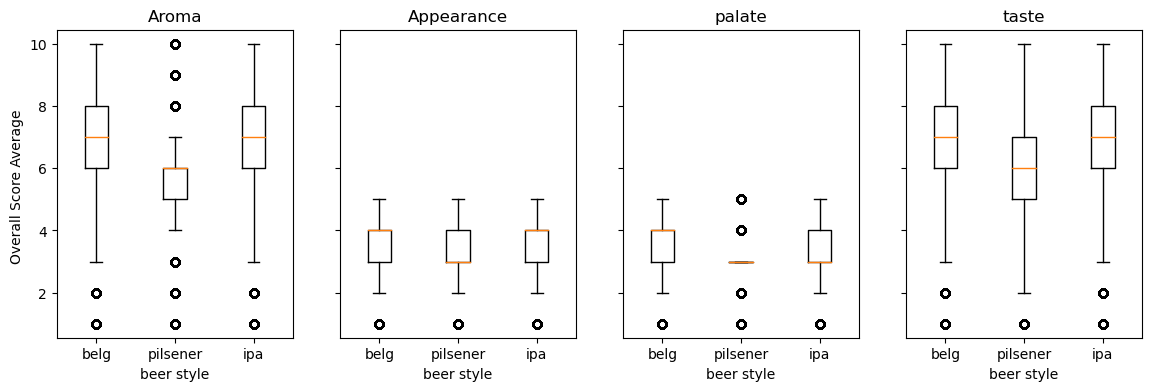

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (14, 4), sharey=True)

#Panel A: accepted vs rejected
axes[0].boxplot([belg_strong_ale_rb['aroma'], pilsener['aroma'], ipa_all_world_rb['aroma']], labels = ['belg', 'pilsener','ipa' ])
axes[0].set_title('Aroma')
axes[0].set_xlabel('beer style')
axes[0].set_ylabel('Overall Score Average ')

#Panel A: rebuttals vs no rebuttals
axes[1].boxplot([belg_strong_ale_rb['appearance'], pilsener['appearance'], ipa_all_world_rb['appearance']], labels = ['belg', 'pilsener', 'ipa'])
axes[1].set_title('Appearance')
axes[1].set_xlabel('beer style')
#axes[1].set_ylabel('Overall Score Average ')

axes[2].boxplot([belg_strong_ale_rb['palate'], pilsener['palate'], ipa_all_world_rb['palate']], labels = ['belg', 'pilsener', 'ipa'])
axes[2].set_title('palate')
axes[2].set_xlabel('beer style')
#axes[2].set_ylabel('Overall Score Average ')

axes[3].boxplot([belg_strong_ale_rb['taste'], pilsener['taste'], ipa_all_world_rb['taste']], labels = ['belg', 'pilsener', 'ipa'])
axes[3].set_title('taste')
axes[3].set_xlabel('beer style')
#axes[3].set_ylabel('Overall Score Average ')


plt.show()